# Start. Initialise modules and hyper parameters

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
import qutip
import pandas as pd
from qiskit.tools.qi.qi import partial_trace
import scipy
from random import shuffle
import random

# Import Data & First Look

In [4]:
iris = pd.read_csv('Iris.csv', header=None)

In [5]:
iris=np.array(iris)

In [6]:
#numericalise the labels for graphing
iris[:,4][iris[:,4] == 'setosa']=1
iris[:,4][iris[:,4] == 'versicolor']=2
iris[:,4][iris[:,4] == 'virginica']=3

In [7]:
plt.scatter(small_iris_train[:,1], small_iris_train[:,0], c=small_iris_train[:,2])
plt.show()

NameError: name 'small_iris_train' is not defined

In [15]:
small_iris=iris[:66,:]

In [12]:
small_iris[:,4]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

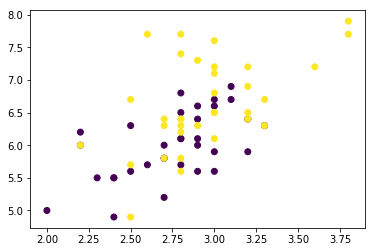

In [8]:
plt.scatter(iris[33:100,1], iris[33:100,0], c=iris[33:100,4])
plt.show()

In [27]:
small_iris[:,4]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [41]:
iris_hard=np.zeroes(66:)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
small_iris_test[:,2]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1], dtype=object)

In [9]:
iris_hard=iris[33:103,:]
iris_hard.shape

(67, 5)

In [14]:
min_max_norm(iris[:,:4], 0,0.5*math.pi)

array([[0.34906585039886573, 0.9817477042468101, 0.1064946662233828,
        0.06544984694978737],
       [0.26179938779914963, 0.6544984694978735, 0.1064946662233828,
        0.06544984694978737],
       [0.17453292519943306, 0.7853981633974483, 0.07987099966753712,
        0.06544984694978737],
       [0.13089969389957462, 0.7199483164476609, 0.13311833277922852,
        0.06544984694978737],
       [0.3054326190990077, 1.0471975511965976, 0.1064946662233828,
        0.06544984694978737],
       [0.47996554429844074, 1.2435470920459595, 0.1863656658909199,
        0.19634954084936213],
       [0.13089969389957462, 0.9162978572970228, 0.1064946662233828,
        0.1308996938995747],
       [0.3054326190990077, 0.9162978572970228, 0.13311833277922852,
        0.06544984694978737],
       [0.043633231299858466, 0.589048622548086, 0.1064946662233828,
        0.06544984694978737],
       [0.26179938779914963, 0.7199483164476609, 0.13311833277922852, 0.0],
       [0.47996554429844074, 1.11

### Normalise the input values between -pi and pi

In [18]:
number_of_inputs = 4 #NOT INCLUDING LABELS

for i in range(number_of_inputs): #normalises iris to values between -pi and pi
    mn=np.min(iris[:,i])
    iris[:,i]=iris[:,i]-mn #add the lowest value
    mx=np.max(iris[:,i])
    iris[:,i]=(iris[:,i]*2/mx) -1
    iris[:,i]=iris[:,i]*math.pi

In [53]:
iris_hard_train,iris_hard_test=shuffle_data(iris_hard,20)

In [10]:
#for 2 inputs only
small_iris=np.zeros((66,3))
small_iris=iris[:66,2:5]
small_iris[:,2]=small_iris[:,2]-1

### Toolset Data

In [1]:
tools = pd.read_csv('annotation.csv', header=None)

NameError: name 'pd' is not defined

In [ ]:
tools=np.array(tools)

In [10]:
tools=tools[1:,1:]

In [11]:
tools=np.array([[float(y) for y in x] for x in tools])

In [12]:
tools[:,:]

array([[224.14727301,  89.9888882 ,   0.        ],
       [125.09996003,  68.0661443 ,   0.        ],
       [286.70019184, 200.81085628,   0.        ],
       [185.02432273, 149.1643389 ,   0.        ],
       [275.68822971, 144.61673485,   0.        ],
       [129.54149914,  54.40588203,   1.        ],
       [ 52.63078947,  16.4924225 ,   1.        ],
       [157.88920166,  47.92702787,   1.        ],
       [138.05795884,  49.        ,   1.        ],
       [104.69001863,  35.        ,   1.        ]])

In [1021]:


for i in range(2): #normalises iris to values between -pi and pi
    mn=np.min(tools[:,i])
    tools[:,i]=tools[:,i]-mn #add the lowest value
    mx=np.max(tools[:,i])
    tools[:,i]=(tools[:,i]*2/mx) -1
    tools[:,i]=tools[:,i]*math.pi

In [57]:
small_iris_train

array([[1.4, 0.2, 0],
       [1.2, 0.2, 0],
       [1.7, 0.4, 0],
       [4.8, 1.8, 1],
       [1.5, 0.4, 0],
       [3.5, 1.0, 1],
       [1.4, 0.1, 0],
       [1.3, 0.2, 0],
       [4.5, 1.5, 1],
       [1.5, 0.4, 0],
       [4.4, 1.4, 1],
       [1.6, 0.4, 0],
       [1.7, 0.5, 0],
       [4.8, 1.4, 1],
       [1.4, 0.3, 0],
       [1.5, 0.3, 0],
       [3.9, 1.1, 1],
       [4.7, 1.6, 1],
       [4.6, 1.3, 1],
       [1.5, 0.1, 0],
       [1.9, 0.2, 0],
       [4.5, 1.5, 1],
       [4.3, 1.3, 1],
       [3.7, 1.0, 1],
       [1.4, 0.2, 0],
       [3.9, 1.2, 1],
       [5.1, 1.6, 1],
       [1.6, 0.2, 0],
       [4.6, 1.5, 1],
       [4.2, 1.5, 1],
       [4.7, 1.4, 1],
       [1.4, 0.2, 0],
       [1.4, 0.2, 0],
       [1.1, 0.1, 0],
       [4.5, 1.3, 1],
       [4.5, 1.5, 1]], dtype=object)

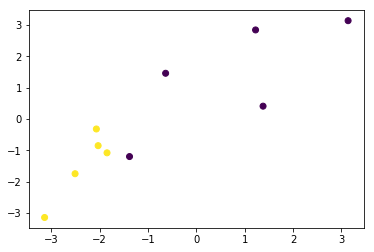

In [1200]:
plt.scatter(tools[:,1], tools[:,0], c=tools[:,2])
plt.show()

In [13]:
def shuffle_data(data,test_size):
    l=[x for x in range(data.shape[0])]
    shuffle(l)
    data_test=data[l[:test_size],:]
    data_train=data[l[test_size:],:]
    return data_train,data_test

def normalise(data):
    l=data.shape[1]
    for i in range(l-1):
        mn=np.min(data[:,i])
        data[:,i]=data[:,i]-mn #add the lowest value
        mx=np.max(data[:,i])
        data[:,i]=(data[:,i]*2/mx) -1
        data[:,i]=data[:,i]*math.pi
    return data

def min_max_norm(data,new_min=-1*math.pi,new_max=math.pi):
    for i in range(data.shape[1]):
        old_min=min(data[:,i])
        old_max=max(data[:,i])
        data[:,i]=((data[:,i]-old_min)/(old_max-old_min)) *(new_max-new_min)+new_min
    return data

In [71]:
small_iris=min_max_norm(small_iris)
iris_hard=normalise(iris_hard)

In [13]:
iris_hard_train, iris_hard_test=shuffle_data(iris_hard,8)

NameError: name 'iris_hard' is not defined

In [14]:
small_iris_train

array([[0.5857206642286054, 0.523598775598299, 0],
       [-2.715613988696262, -2.6179938779914944, -1],
       [-2.3961299900261133, -2.356194490192345, -1],
       [0.6922153304519879, 0.523598775598299, 0],
       [0.5857206642286054, 0.523598775598299, 0],
       [-2.6091193224728793, -2.6179938779914944, -1],
       [0.26623666555845704, 0.523598775598299, 0],
       [0.9052046628987537, 0.2617993877991492, 0],
       [0.7987099966753711, 0.7853981633974483, 0],
       [-0.3727313317818399, 0.0, 0],
       [-2.502624656249496, -2.356194490192345, -1],
       [-2.822108654919645, -2.356194490192345, -1],
       [-2.3961299900261133, -2.8797932657906435, -1],
       [1.2246886615689019, 0.7853981633974483, 0],
       [0.5857206642286054, 0.523598775598299, 0],
       [-2.822108654919645, -2.8797932657906435, -1],
       [-0.4792259980052228, -0.7853981633974483, 0],
       [0.7987099966753711, -0.2617993877991495, 0],
       [-2.6091193224728793, -2.356194490192345, -1],
       [-0.

In [11]:
small_iris_train, small_iris_test=shuffle_data(small_iris,20)

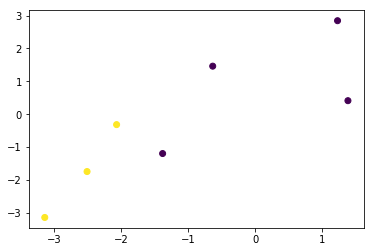

In [1033]:
plt.scatter(tools_train[:,1], tools_train[:,0], c=tools_train[:,2])
plt.show()

In [1034]:
tools_train

array([[ 2.84599572,  1.22600521,  0.        ],
       [-3.14159265, -3.14159265,  1.        ],
       [ 1.46246853, -0.63618989,  0.        ],
       [ 0.41228109,  1.38102735,  0.        ],
       [-1.19628403, -1.38350886,  0.        ],
       [-1.74415335, -2.51069244,  1.        ],
       [-0.31611396, -2.0700262 ,  1.        ]])

# Create Quantum Circuit 

## First begin with Tensor Network tutorial with np.einsum

### Creating Tensors

In [218]:
# rank = number of indexes specified in size
# dimension of index = size of each dimension given 

b=np.random.rand(2,2,4,4) # rank 4 tensor with index dimensions 2,2,4,4

c=np.random.rand(4,4,2,2,3) # rank 5 tensor with index dimensions 4,4,2,2,3

### Contracting Tensors with einsum

In [219]:
np.einsum('ijkl,klnmo->ijnmo',b,c) 
# specify precisely the summed indexes and the arrangement of the output indexes via einsum

array([[[[[ 4.51297115,  4.22537147,  4.76600961],
          [ 5.4385795 ,  5.8594833 ,  4.20420394]],

         [[ 5.4981139 ,  4.61458175,  2.71946403],
          [ 5.15827326,  5.61370457,  4.81097696]]],


        [[[ 4.00264123,  3.62645039,  3.96459482],
          [ 4.54313951,  5.19974657,  3.63547933]],

         [[ 5.0378848 ,  4.37818158,  2.48091364],
          [ 4.20177668,  4.992921  ,  4.26936581]]]],



       [[[[ 3.75227464,  3.30442711,  3.76343652],
          [ 3.8536084 ,  4.24091794,  4.29071058]],

         [[ 4.11547261,  3.8910521 ,  2.47876985],
          [ 3.90809195,  5.38862393,  3.44930915]]],


        [[[ 4.62346468,  4.13241567,  4.18376489],
          [ 4.94456333,  5.90699829,  5.67739428]],

         [[ 5.18088325,  4.89473833,  3.4815267 ],
          [ 4.76192781,  6.60356393,  4.97311175]]]]])

### Reshaping tensors 

In [220]:
#can reshape tensor into matrix but must multiply index dimensions correctly to get correct matrix size
c2=np.reshape(c, (16,12))
#cruicially, can reshape back to original too
c3=np.reshape(c, (4,4,2,2,3))
print(c3-c)

[[[[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]]



 [[[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]]



 [[[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]


  [[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
    [ 0.  0.  0.]]]]



 [[[[ 0.  0.  0.]
    [ 0.  0.  0.]]

   [[ 0.  0.  0.]
  

### Projecting a vector/input into a tensor (same as contracting except one is a tensor)

In [222]:
d=np.random.rand(2)
print(b.shape)
np.einsum('ijkl,i->jkl',b,d).shape

#NB Theres no need to change dimensionality of the vector (2,1) or (1,2) - it simply works either way
# just specify the index needing to be summed

(2, 2, 4, 4)


(2, 4, 4)

## End of Tensor Network Tutorial -----

# Coding MPS's

# Useful Functions


In [28]:
def full_tensor(sequence):
    """tensor product of a sequence in the form of a list of arrays""" 
    for k in range(len(sequence)-1):
        if k==0:
            a=sequence[0]
        a=np.array(np.kron(a,sequence[k+1]), dtype=complex)
    return a

def encode(input_set):
    "encodes (normalised between -1 and 1) input data into appropriate qubit vectors. "
    dm=np.zeros([input_set.shape[0],2**input_set.shape[1]], dtype=complex)
    for i in range(input_set.shape[0]): # training set size
        b=[]
        for j in range(input_set.shape[1]): # size of input
            b.append(np.array([math.cos(input_set[i,j]*0.5),math.sin(input_set[i,j]*0.5)]))
        dm[i,:]=full_tensor(b)
    dm=np.kron(np.transpose(dm),dm)
    return dm

def encode_list(input_set,ancilla):
    """encodes a list (already normalised between -pi and pi)"""
    b=[]
    for j in range(len(input_set)):
        b.append(np.array([math.cos(input_set[j]*0.5),math.sin(input_set[j]*0.5)]))
    for k in range(ancilla):
        b.append(np.array([1,0]))
    dm=full_tensor(b)
    dm=np.reshape(np.kron(np.transpose(dm),dm),(2**(len(input_set)+ancilla),2**(len(input_set)+ancilla)))
    return dm


def blockshaped(arr, nrows, ncols):
    #taken from online. this splits arrays into blocks of given size as described below. will need for partial tracing
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

def remove_last(dm, env_size=1):
    "traces out the last qubit from a dm"
    if dm.shape[0]!= dm.shape[1]:
        print('Error. Array must be a square matrix')
    if dm.shape[0]==2**env_size:
        print('Error. Environment size is the same size as the matrix you wanna trace')
    if dm.shape[0]>2**env_size:
        blocks=blockshaped(dm,2**env_size,2**env_size)
        no_blocks=len(blocks)
        new_dm=np.zeros(no_blocks, dtype=complex)
        for j in range(no_blocks):
            new_dm[j]=np.trace(blocks[j])
        new_dm=np.reshape(new_dm,(int(math.sqrt(no_blocks)),int(math.sqrt(no_blocks))))
    return new_dm

def tracing_out(dm,tracing_out):
    l=[]
    for i in range(tracing_out):
        l.append(i) #l contains list of indexes to trace out
    new_dm=partial_trace(dm,l)
    return new_dm

def measure_zero(dm):
    "measures a qubit and outputs the probability of getting a zero"
    if dm.shape[0]!=2:
        print("your density matrix isnt 2x2")
    a=np.array([[1,0],[0,0]])
    prob=np.trace(np.matmul(dm,a))
    return prob
    
def initialise(no_inputs, ancilla, bond_dimension,identity=0):
    """generates the right number of random unitaries of the right size"""
    total=no_inputs+ancilla
    operator_list=[]
    temp_operator_list=[]
    for i in range(no_inputs):
        if identity==1:
            operator_list.append(np.identity(bond_dimension).astype(complex))
        elif identity==2:
            tt=qutip.rand_unitary(bond_dimension).full()
            operator_list.append(np.dot(tt,tt*1J))
        else:
            operator_list.append(qutip.rand_unitary(bond_dimension).full().astype(complex))
    
    return operator_list

def evaluate_circuit(inputs,operator_list, trace):
    for i in range(len(operator_list)):
        diff=int(math.log2(inputs.shape[0])-math.log2(operator_list[i].shape[0]))
        if diff>0:
            inputs=np.matmul(np.kron(operator_list[i],np.identity(2**diff)), inputs)
            inputs=np.matmul(inputs,np.matrix(np.kron(operator_list[i],np.identity(2**diff))).getH())
        else:
            inputs=np.matmul(operator_list[i], inputs)
            inputs=np.matmul(inputs,np.matrix(operator_list[i]).getH())
        if trace==1:
            inputs=partial_trace(inputs,[0])
    return inputs

def extract_final(dm):
    L=dm.shape[0]
    if L>2:
        dm=tracing_out(dm,int(math.log2(L)-1))
    return dm

def cost_calc(label,answer):
    answer=(1-np.real(answer))
    cost=abs(label-answer)
    return cost
def cost_calc2(label,answer):
    answer=(1-np.real(answer))
    cost=abs(label-np.round(answer))
    return cost

def eval_cost_function(operator_list,test_data,rounding):
    cost=np.zeros(test_data.shape[0])
    for k in range(len(test_data)):
        input_values=encode_list([test_data[k,0],test_data[k,1]],ancilla)
        label=test_data[k,2]
        final_dm1=evaluate_circuit(input_values,operator_list, trace=1)
        final_dm2=extract_final(final_dm1)
        answer=measure_zero(final_dm2)
        if answer>1 or answer<0:
            print("error, weird probability")
            print(answer)
            print(final_dm2)
            print('dm2 trace is', np.trace(final_dm2))
            print(final_dm1)
            print('dm1 trace is', np.trace(final_dm2))
        if rounding==0:
            cost[k]=cost_calc(label,answer)
        if rounding==1:
            cost[k]=cost_calc2(label,answer)
    
    total_cost=sum(cost)
    return total_cost

"""def test(operator_list):
    for k in range(len(test_label)):
        input_values=encode_list([test_iris0[k],test_iris1[k]],ancilla)
        label=test_label[k]
        final_dm1=evaluate_circuit(input_values,operator_list, trace=1)
        final_dm2=extract_final(final_dm1)
        answer=ure_zero(final_dm2)

        cost[k]=cost_calc(label,answer)
    total_cost=sum(cost)
    return total_cost"""
def regularise(mat,power):
    "just zeros tiny numbers"
    np.imag(mat)[abs(np.imag(mat))<10**(-power)]=0
    np.real(mat)[abs(np.real(mat))<10**(-power)]=0
    return mat

def ry(theta):
    return np.array([math.cos(theta/2), -1*math.sin(theta/2)],[math.sin(theta/2),math.cos(theta/2)])

def initialise_params(no_params):
    params=np.zeros(no_params)
    for i in range(no_params):
        params[i]=(random.random())
    params=(2*(params)-1)*math.pi
    return params

In [112]:
cost=[]
printer=-5
no_inputs=2
BD=8 # BD IS SIMPLY THE BOND DIMENSION AS USUAL
ancilla=int(math.log2(BD)-1)
operator_list=initialise(no_inputs,ancilla,BD,identity=1)
w=0.001
mu=0.7
data=small_iris_train
test_data=small_iris_test
total_cost=eval_cost_function(operator_list,data,rounding=0)
print(total_cost)
iterations=1
for z in range(iterations):
    for j in range(len(operator_list)):
        grad=np.zeros(operator_list[j].size)
        for i in range(operator_list[j].size):
            W=np.zeros(operator_list[j].size,dtype=complex)
            W[i]=w
            W=np.reshape(W,operator_list[j].shape)
            W=W+operator_list[j]
            new_list=np.copy(operator_list)
            new_list=new_list.astype(complex)
            new_list[j]=W
            new_cost=eval_cost_function(new_list,data,rounding=0)
            grad[i]=(new_cost-total_cost)
        grad=np.reshape(grad,operator_list[j].shape)
        print('wtf')
        G=np.matmul(grad,np.matrix.getH(operator_list[j]))-np.matmul(operator_list[j],np.matrix.getH(grad))      
        print('is this unitary?', qutip.Qobj(np.matmul(scipy.linalg.expm(-1*mu*G),np.matrix.getH(scipy.linalg.expm(-1*mu*G)))))
        operator_list[j]=np.matmul(scipy.linalg.expm(-1*mu*G),operator_list[j])
        new_cost=eval_cost_function(operator_list,data,rounding=0)
        
        total_cost=new_cost
        """grad=np.zeros(operator_list[j].size)
        grad=grad.astype(complex)
        for i in range(operator_list[j].size):
            W=np.zeros(operator_list[j].size,dtype=complex)
            W[i]=1J*w
            W=np.reshape(W,operator_list[j].shape)
            W=W+operator_list[j]
            new_list=np.copy(operator_list)
            new_list=new_list.astype(complex)
            new_list[j]=W
            new_cost=eval_cost_function(new_list,data,rounding=0)
            grad[i]=(new_cost-total_cost)*(1J)
        grad=np.reshape(grad,operator_list[j].shape)
        G=np.matmul(grad,np.matrix.getH(operator_list[j]))-np.matmul(operator_list[j],np.matrix.getH(grad))      
        operator_list[j]=operator_list[np.matmul(scipy.linalg.expm(-1*mu*G),operator_list[j]) 
        new_cost=eval_cost_function(operator_list,data,rounding=0)
        
        
        change=(total_cost-new_cost)/(total_cost)
        total_cost=new_cost"""
        #change=(total_cost-new_cost)
    print("Cost at iteration ", z, "is", total_cost)
print("Final Cost with rounding is " ,eval_cost_function(operator_list,data,rounding=1))
print("Test Result without rounding is ", eval_cost_function(operator_list,test_data,rounding=0))
print("Test Result with rounding is ", eval_cost_function(operator_list,test_data,rounding=1))

50.3828601821
error, weird probability
(1.00115698323+0j)
[[  1.00115698e+00+0.j  -2.66359159e-02+0.j]
 [ -2.66359159e-02+0.j   7.08652162e-04+0.j]]
dm2 trace is (1.00186563539+0j)
[[  9.34217156e-01+0.j  -2.50072660e-01+0.j  -2.48533111e-02+0.j
    6.65942463e-03+0.j]
 [ -2.50072660e-01+0.j   6.69398274e-02+0.j   6.65277186e-03+0.j
   -1.78260485e-03+0.j]
 [ -2.48533111e-02+0.j   6.65277186e-03+0.j   6.61181468e-04+0.j
   -1.77163040e-04+0.j]
 [  6.65942463e-03+0.j  -1.78260485e-03+0.j  -1.77163040e-04+0.j
    4.74706936e-05+0.j]]
dm1 trace is (1.00186563539+0j)
error, weird probability
(1.00129092983+0j)
[[  1.00129093e+00+0.j   2.66376985e-02+0.j]
 [  2.66376985e-02+0.j   7.08652162e-04+0.j]]
dm2 trace is (1.00199958199+0j)
[[  1.00129093e+00+0.j   0.00000000e+00+0.j   2.66376985e-02+0.j
    0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j
    0.00000000e+00+0.j]
 [  2.66376985e-02+0.j   0.00000000e+00+0.j   7.08652162e-04+0.j
    0.00000000e+00+0

In [84]:
small_iris_train.shape

(46, 3)

In [26]:
np.savez('2_8_operators_halfhalftraintest_iris.npz',operator_list)

In [ ]:
qutip.Qobj(encode_list(small_iris_train[:,1],2))

In [29]:
qutip.Qobj(operator_list[0])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[  7.72317552e-01+0.12454335j   2.38265971e-02+0.07587974j
   -1.32811362e-01-0.33812393j  -2.43831934e-02-0.06647168j
    7.49357276e-02-0.08637294j   2.81385648e-02+0.34644238j
   -1.35727303e-01-0.02952267j   3.02226646e-01+0.01361093j]
 [ -8.49203349e-02-0.02352357j   1.70488710e-01+0.10132648j
   -5.40565154e-01-0.22799548j   4.53336814e-01+0.42703022j
   -1.73205422e-02+0.04038379j  -2.19678462e-01+0.02711673j
    1.68859972e-01+0.19712452j  -8.78808448e-02+0.30792923j]
 [ -6.30270595e-02+0.24087556j   4.86260812e-01-0.61332902j
   -1.10264219e-01-0.12371923j  -2.13003682e-01+0.08328247j
   -1.13677738e-01-0.25252312j   3.71710054e-01-0.02065541j
   -4.91513172e-04-0.04783751j  -7.48370839e-02+0.14979481j]
 [  3.48834323e-01+0.10237254j  -1.52006719e-02+0.22831624j
    4.89111648e-02+0.04191805j   2.76366623e-01-0.12996386j
    2.12673406e-01-0.11066391j   4.08207282e-01-0.43964997j
    2.

In [18]:
print("Final Cost with rounding is " ,eval_cost_function(operator_list,data,rounding=1))
print("Test Result without rounding is ", eval_cost_function(operator_list,test_data,rounding=0))
print("Test Result with rounding is ", eval_cost_function(operator_list,test_data,rounding=1))

Final Cost with rounding is  29.0
Test Result without rounding is  11.8525027397
Test Result with rounding is  8.0


In [90]:
eval_cost_function(operator_list,data,rounding=1)

[[ 0.91665696+0.j  0.27640003+0.j]
 [ 0.27640003+0.j  0.08334304+0.j]]
(2, 2)
(0.916656959541+0j)
[[ 0.04468261+0.j -0.20660609+0.j]
 [-0.20660609+0.j  0.95531739+0.j]]
(2, 2)
(0.0446826135725+0j)
[[ 0.13261292+0.j -0.33915592+0.j]
 [-0.33915592+0.j  0.86738708+0.j]]
(2, 2)
(0.132612924568+0j)
[[ 0.88491699+0.j  0.31912209+0.j]
 [ 0.31912209+0.j  0.11508301+0.j]]
(2, 2)
(0.884916991715+0j)
[[ 0.91665696+0.j  0.27640003+0.j]
 [ 0.27640003+0.j  0.08334304+0.j]]
(2, 2)
(0.916656959541+0j)
[[ 0.06922296+0.j -0.25383290+0.j]
 [-0.25383290+0.j  0.93077704+0.j]]
(2, 2)
(0.0692229593031+0j)
[[ 0.98238393+0.j  0.13155128+0.j]
 [ 0.13155128+0.j  0.01761607+0.j]]
(2, 2)
(0.982383934407+0j)
[[ 0.80876231+0.j  0.39327578+0.j]
 [ 0.39327578+0.j  0.19123769+0.j]]
(2, 2)
(0.808762307473+0j)
[[ 0.84881576+0.j  0.35822837+0.j]
 [ 0.35822837+0.j  0.15118424+0.j]]
(2, 2)
(0.848815760567+0j)
[[ 0.96566809+0.j -0.18208029+0.j]
 [-0.18208029+0.j  0.03433191+0.j]]
(2, 2)
(0.965668088726+0j)
[[ 0.09864418+0.j 

50.0

In [1204]:
tt=qutip.rand_unitary(4).full()
print(tt)
u,v,w=np.linalg.svd(tt)
print(v)

[[ 0.75058857+0.00437676j -0.32450309-0.09182634j -0.35139605+0.41486522j
  -0.16169072+0.03357192j]
 [ 0.41840074-0.05824109j  0.90194796-0.00438675j  0.06267576+0.00706104j
   0.02689684+0.05760113j]
 [ 0.36268541+0.32061084j -0.22003486-0.13261931j  0.63816121-0.16054107j
   0.45937977+0.23582161j]
 [-0.15364117-0.01445039j  0.06972942+0.04325385j -0.3966367 +0.33179168j
   0.83778808+0.01253918j]]
[1. 1. 1. 1.]


[[ 0.49105964-0.52549388j  0.        +0.j          0.64749262-0.25193235j
   0.        +0.j        ]
 [ 0.        +0.j          0.4924356 +0.73080847j  0.        +0.j
   0.46949877-0.05474552j]
 [-0.65212706+0.23968084j  0.        +0.j          0.71591378+0.06892642j
   0.        +0.j        ]
 [ 0.        +0.j         -0.23495091-0.41015148j  0.        +0.j
   0.88040644-0.03818804j]]
[[0.        -0.52549388j 0.        +0.j         0.64749262-0.25193235j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.73080847j 0.        +0.j
  0.        -0.05474552j]
 [0.        +0.23968084j 0.        +0.j         0.71591378+0.06892642j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.41015148j 0.        +0.j
  0.88040644-0.03818804j]]


In [168]:
N=np.random.rand(4,4)
def trace_last(dm,tracing_out):
    for i in range(tracing_out):
        L=int(dm.shape[0]*0.5)
        a=np.trace(N[0:L,0:L])
        b=np.trace(N[0:L,L:2*L])
        c=np.trace(N[L:2*L,0:L])
        d=np.trace(N[L:2*l,L:2*L])
        l=[a,b,c,d]
        l=np.asarray(l)
        dm=np.reshape(l,(2,2))
    return dm

In [171]:
N

array([[0.05770041, 0.53411366, 0.59571219, 0.55373552],
       [0.4003518 , 0.62921149, 0.64260368, 0.9732211 ],
       [0.23996156, 0.15307084, 0.32869864, 0.13941781],
       [0.98162122, 0.28869923, 0.3299101 , 0.58022901]])

In [184]:
a=np.trace(N[0:2,0:2])
b=np.trace(N[0:2,2:4])
c=np.trace(N[2:4,0:2])
d=np.trace(N[2:4,2:4])
l=[a,b,c,d]
l=np.asarray(l)
print(l)
np.reshape(l,(2,2))

[0.6869119  1.56893328 0.52866079 0.90892765]


array([[0.6869119 , 1.56893328],
       [0.52866079, 0.90892765]])

In [43]:
small_iris[30:45,:]

array([[-2.502624656249496, -2.8797932657906435, 1],
       [-2.6091193224728793, -2.356194490192345, 1],
       [0.7987099966753711, 0.2617993877991492, 2],
       [0.5857206642286054, 0.523598775598299, 2],
       [1.0116993291221368, 0.523598775598299, 2],
       [0.05324733311169127, 0.0, 2],
       [0.6922153304519879, 0.523598775598299, 2],
       [0.5857206642286054, 0.0, 2],
       [0.7987099966753711, 0.7853981633974483, 2],
       [-0.6922153304519886, -0.7853981633974483, 2],
       [0.6922153304519879, 0.0, 2],
       [-0.053247333111691615, 0.2617993877991492, 2],
       [-0.4792259980052228, -0.7853981633974483, 2],
       [0.26623666555845704, 0.523598775598299, 2],
       [0.05324733311169127, -0.7853981633974483, 2]], dtype=object)

In [300]:
# function(normalise) that normalises data appropriately XXX
# function(create_dm) produces initial rho XXXXX
# function(get rid of) ditches the first qubit XXXXX
# function(measure) measures the last qubit (super easy) XXXX
# function(elongate) that tensors a unitary with appropriate sized identity matrix XXXX
# function(initialise) that initialises right number (and size) of unitaries XXXX
# process (optimise) that optimises these unitaries according to a cost function
# process (evaluate) that evaluates the circuit.
z=np.random.rand(5,1)
np.kron(np.transpose(z),z)

array([[ 0.52888268,  0.32374209,  0.16384487,  0.48450909,  0.67869732],
       [ 0.32374209,  0.19817049,  0.10029347,  0.29657993,  0.41544731],
       [ 0.16384487,  0.10029347,  0.05075822,  0.15009819,  0.2102566 ],
       [ 0.48450909,  0.29657993,  0.15009819,  0.44385848,  0.62175419],
       [ 0.67869732,  0.41544731,  0.2102566 ,  0.62175419,  0.87094939]])

In [659]:
print(small_iris[0:10,1].shape)
print(test_iris1.shape)

(10,)
(26,)


# TO DO LIST:

## - check the existing quantum architectures that we are using

## - read on "proper" evolution with unitarity constraints

## - code the circuit

## - try a completely adaptive implementation

## - consider a purely quantum optimisation

In [34]:
A=qutip.rand_unitary(4).full()
A

array([[ 0.67728728-0.04510286j, -0.03767357+0.59710738j,
        -0.07876553+0.07457206j,  0.30078743-0.28116378j],
       [-0.27143852+0.49191928j,  0.63722363+0.34506098j,
         0.14640201+0.2680105j ,  0.2010418 +0.15979529j],
       [-0.04464229-0.0941223j , -0.24845995+0.17756922j,
         0.94572618-0.00818055j, -0.03536123+0.01302057j],
       [-0.28207055-0.36492258j, -0.01999003-0.15251119j,
         0.00643183-0.02157599j,  0.87342314-0.01528317j]])

In [35]:
q,r=np.linalg.qr(A)

In [36]:
np.imag(r)[abs(np.imag(r))<0.000001]=0
np.real(r)[abs(np.real(r))<0.000001]=0
r

array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [37]:
q

array([[-0.67728728+0.04510286j,  0.03767357-0.59710738j,
         0.07876553-0.07457206j, -0.30078743+0.28116378j],
       [ 0.27143852-0.49191928j, -0.63722363-0.34506098j,
        -0.14640201-0.2680105j , -0.2010418 -0.15979529j],
       [ 0.04464229+0.0941223j ,  0.24845995-0.17756922j,
        -0.94572618+0.00818055j,  0.03536123-0.01302057j],
       [ 0.28207055+0.36492258j,  0.01999003+0.15251119j,
        -0.00643183+0.02157599j, -0.87342314+0.01528317j]])